In [1]:
#Load Packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import os

In [3]:
# get main directory of project

In [4]:
CWD_PATH = os.getcwd()

In [5]:
# Load model .tflite and catching details of model

In [6]:
interpreter = tf.lite.Interpreter(model_path=CWD_PATH+'/tflite/model.tflite')

interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [7]:
# Image of test

In [8]:
image=CWD_PATH+'/test/cam_image45.jpg'

In [9]:
# threshold of decision score

In [10]:
threshold=0.6

In [11]:
# Getting labels 

In [12]:
labels = open(CWD_PATH+'/conf_model/labelmap.pbtxt')

labelmap=[]    
for i in labels:
    if i.rfind('name:')>0:
        label=i[(i.rfind(':')+1):len(i)]
        labelmap.append(label.replace('\n','').replace(' ','').replace('\'',''))

In [13]:
# Load image of test and applying the normalization of image 

In [14]:
x=cv2.imread(image)
img_orig=x.copy()


height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

x= cv2.resize(x, (width, height), interpolation = cv2.INTER_AREA)
img_rorig=x.copy()
input_data = np.expand_dims(x, axis=0)

input_data = (2.0 / 255.0) * input_data - 1.0
input_data = input_data.astype('float32')

In [15]:
# Predict of image

In [16]:
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()


boxes = interpreter.get_tensor(output_details[0]['index'])
classes = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])

In [17]:
# Generating the boxs (ROIs) in image of test

In [18]:
for i in np.where(scores[0]>=threshold)[0]:

    im_height,im_width,ret = img_orig.shape
    ymin,xmin,ymax,xmax=boxes[0][i]

    box=(int(xmin * im_width), int(xmax * im_width),
                int(ymin * im_height), int(ymax * im_height))

    start_point = (box[0],box[2])
    end_point=(box[1],box[3])

    cv2.rectangle(img_orig, start_point,end_point,(0,255,0),2)
    cv2.putText(img_orig,'Class: '+labelmap[int(classes[0][i])]+', Prob: '+str(round(100*scores[0][i],2)),(box[0],box[2]), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0, 0), lineType=cv2.LINE_AA)

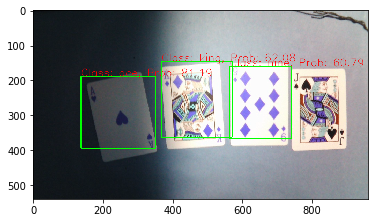

In [19]:

plt.imshow(img_orig)